<a href="https://colab.research.google.com/github/jyotiraj-code/dissertation/blob/main/Expectation_Value_Qiskit_and_Quimb_Comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports
!pip install qiskit --quiet
!pip install qiskit_aer --quiet
!pip install qiskit_ibm_runtime --quiet
!pip install -U git+https://github.com/jcmgray/quimb.git --quiet



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting req

In [31]:
#Generation of the random number of qubits and random state

import random

def generate_qubits_number():
    return random.choice([i for i in range(1,15) if i % 2 == 0])

num_qubits = generate_qubits_number()
print(f"The generated even number is: {num_qubits}")

def generate_random_binary(length):
    return ''.join(random.choice(['0', '1']) for _ in range(length))

state_length = num_qubits
random_state = generate_random_binary(state_length)
print(f"The generated random state is: {random_state}")
print()


The generated even number is: 12
The generated random state is: 010111000110



Does similar thing but using an array:

In [52]:
import random

# Function to generate a random binary string of a given length
def generate_random_binary(length):
    return ''.join(random.choice(['0', '1']) for _ in range(length))

# Initialize lists to store num_qubits and random_states
num_qubits_list = []
random_states_list = []

# Start from num_qubits = 2 and increase by 2 up to 12 qubits
for num_qubits in range(2, 24, 2):
    # Generate a random binary string based on num_qubits
    random_state = generate_random_binary(num_qubits)

    # Store values in the lists
    num_qubits_list.append(num_qubits)
    random_states_list.append(random_state)


# Now, num_qubits_list and random_states_list have stored values
print("Stored num_qubits:", num_qubits_list)
print("Stored random_states:", random_states_list)


Stored num_qubits: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]
Stored random_states: ['11', '0001', '111010', '00010100', '0111110110', '101111110100', '10111111100101', '1110110011011001', '111000011010011101', '00010110001000011100', '1010010001010010011100']


Creating the other array to do the vector multiplication:

In [53]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, statevector_simulator
from qiskit.visualization import plot_histogram
import numpy as np

required_array_list = []
#Defining the circuit

#Encoding the random state
for idx, num_qubits in enumerate(num_qubits_list):
    qc_other_state = QuantumCircuit(num_qubits)
    random_state = random_states_list[idx]
    for i, number in enumerate(random_state):
      if number == '1':
          qc_other_state.x(i)

    #Getting the array
    backend = Aer.get_backend('statevector_simulator')
    qc_ex_other = transpile(qc_other_state, backend)
    job = backend.run(qc_ex_other)
    result = job.result()

    array1 = result.get_statevector(qc_ex_other, decimals=3)

    # Convert the statevector to an np.array
    output_array_1= np.array(array1.data)  # .data gets the statevector in numpy format

    # # Print the output statevector as numpy array
    # print("Statevector as numpy array:")
    # print(output_array_1)

    required_array_list.append(np.transpose(output_array_1))
    print()

print("Required Array list: ", required_array_list)












Required Array list:  [array([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]), array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j

# QISKIT

## Working Code for two qubit system (just used for checking)

┌───┐                 
qreg_0: ┤ H ├─■─────────────X─
        ├───┤ │P(π/2) ┌───┐ │ 
qreg_1: ┤ X ├─■───────┤ H ├─X─
        └───┘         └───┘   
creg: 1/══════════════════════

{'0': 1000}


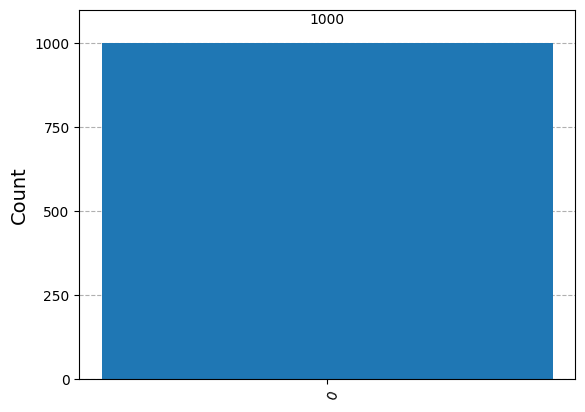

Statevector([ 0.5-0.j , -0.5+0.j ,  0. +0.5j, -0. -0.5j],
            dims=(2, 2))


In [7]:
# Delete the following
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import Aer, statevector_simulator
from qiskit.visualization import plot_histogram
import numpy as np


q = QuantumRegister(2, "qreg")
c = ClassicalRegister(1, "creg")
qc = QuantumCircuit(q,c)

#Encode the state
qc.x(q[1])
#Apply Hadmard
qc.h(q[0])

#Apply the Phase Gate
qc.cp(theta = np.pi/2, control_qubit = q[0], target_qubit = q[1])

#Apply the Hadamard on the qubit - 1
qc.h(q[1])

#Apply the SWAP Gate
qc.swap(q[1], q[0])

#Apply the RZZ(theta = pi/2) gate
# qc.rzz(np.pi/2, q[1], q[0])

# #Apply again the SWAP Gate
# qc.swap(q[1], q[0])

# #Apply again Hadamard Gate to the qubit 1
# qc.h(q[1])
# #Apply again the controlled Phase gate
# qc.cp(theta = np.pi/2, control_qubit = q[0], target_qubit = q[1])

# #Apply Hadamard to the qubit 0
# qc.h(q[0])


# Measurements


display(qc.draw())

#Statevector simulator
backend = Aer.get_backend('statevector_simulator')
qc_ex = transpile(qc, backend)
job = backend.run(qc_ex, shots = 1000)
result = job.result()
outputstate = result.get_statevector(qc_ex, decimals=3)
counts = result.get_counts()

print(counts)
display(plot_histogram(counts))
print(outputstate)



## Working Code for n qubit system

In [54]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import Aer, statevector_simulator
from qiskit.visualization import plot_histogram
import numpy as np
from math import pi

qiskit_array_list = []

for idx, num_qubits in enumerate(num_qubits_list):
    random_state = random_states_list[idx]

    qc_qiskit = QuantumCircuit(num_qubits)

    # Encoding the random state
    for i, number in enumerate(random_state):
        if number == '1':
            qc_qiskit.x(i)

    # Defining and applying the QFT function
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)

    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit

    def qft(circuit, n):
        """QFT on the first n qubits in circuit"""
        qft_rotations(circuit, n)
        swap_registers(circuit, n)
        return circuit

    # Applying the QFT Function
    qft(qc_qiskit, num_qubits)

    # Applying the RZZ (theta) gate

    # Display the circuit
    # display(qc_qiskit.draw())

    # Running the statevector simulation
    backend = Aer.get_backend('statevector_simulator')
    qc_ex = transpile(qc_qiskit, backend)
    job = backend.run(qc_ex)
    result = job.result()

    # Getting the plot for the result
    # plot_histogram(result.get_counts())

    # Getting the output statevector
    array2 = result.get_statevector(qc_ex, decimals=3)

    # Convert the statevector to an np.array
    qiskit_array_list.append(np.array(array2.data))  # .data gets the statevector in numpy format

    # # Print the output statevector as numpy array
    # print("Statevector as numpy array:")
    # print(qiskit_array)

qiskit_array_list

[array([ 0.5-0.j , -0. -0.5j, -0.5+0.j ,  0. +0.5j]),
 array([ 0.25+0.j, -0.25-0.j,  0.25+0.j, -0.25-0.j,  0.25+0.j, -0.25-0.j,
         0.25+0.j, -0.25-0.j,  0.25+0.j, -0.25-0.j,  0.25+0.j, -0.25-0.j,
         0.25+0.j, -0.25-0.j,  0.25+0.j, -0.25-0.j]),
 array([ 0.125-0.j   , -0.079+0.097j, -0.024-0.123j,  0.11 +0.059j,
        -0.115+0.048j,  0.036-0.12j ,  0.069+0.104j, -0.124-0.012j,
         0.088-0.088j,  0.012+0.124j, -0.104-0.069j,  0.12 -0.036j,
        -0.048+0.115j, -0.059-0.11j ,  0.123+0.024j, -0.097+0.079j,
        -0.   -0.125j,  0.097+0.079j, -0.123+0.024j,  0.059-0.11j ,
         0.048+0.115j, -0.12 -0.036j,  0.104-0.069j, -0.012+0.124j,
        -0.088-0.088j,  0.124-0.012j, -0.069+0.104j, -0.036-0.12j ,
         0.115+0.048j, -0.11 +0.059j,  0.024-0.123j,  0.079+0.097j,
        -0.125+0.j   ,  0.079-0.097j,  0.024+0.123j, -0.11 -0.059j,
         0.115-0.048j, -0.036+0.12j , -0.069-0.104j,  0.124+0.012j,
        -0.088+0.088j, -0.012-0.124j,  0.104+0.069j, -0.12 +0.03

Doing the product to get the expectation value:

In [55]:
# Compute the dot product

dot_product_result_qiskit= []

# Ensure both lists have the same length for dot product calculation
assert len(required_array_list) == len(qiskit_array_list), "Array lengths must match."

# Loop over the arrays and compute the dot product for each corresponding pair
for i in range(len(required_array_list)):
    array1 = required_array_list[i]
    array2 = qiskit_array_list[i]

    # Compute the dot product
    dot_product_result_qiskit.append(np.dot(array1, array2))

    # Alternatively, you can use array1 @ array2 for matrix multiplication
    # dot_product_result = array1 @ array2

print(dot_product_result_qiskit)
print()

[0.5j, (0.25+0j), (-0.012+0.124j), 0.062j, (-0.001+0.031j), (0.011-0.011j), (0.007+0.003j), (-0.002-0.003j), (-0.001-0.002j), -0.001j, 0j]



#QUIMB

## Working Code for the two qubit systen (Just For Checking)

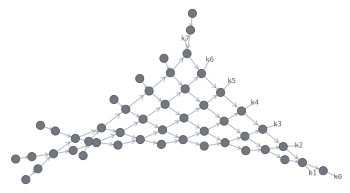

array([[ 6.25000000e-02+0.00000000e+00j],
       [ 6.25000000e-02-1.53080850e-17j],
       [ 1.14810637e-17+6.25000000e-02j],
       [ 2.67891487e-17+6.25000000e-02j],
       [ 6.25000000e-02-7.65404249e-18j],
       [ 6.25000000e-02-2.29621275e-17j],
       [ 1.91351062e-17+6.25000000e-02j],
       [ 3.44431912e-17+6.25000000e-02j],
       [-3.82702125e-18-6.25000000e-02j],
       [-1.91351062e-17-6.25000000e-02j],
       [ 6.25000000e-02-1.53080850e-17j],
       [ 6.25000000e-02-3.06161700e-17j],
       [-1.14810637e-17-6.25000000e-02j],
       [-2.67891487e-17-6.25000000e-02j],
       [ 6.25000000e-02-2.29621275e-17j],
       [ 6.25000000e-02-3.82702125e-17j],
       [ 3.82702125e-18+6.25000000e-02j],
       [ 1.91351062e-17+6.25000000e-02j],
       [-6.25000000e-02+1.53080850e-17j],
       [-6.25000000e-02+3.06161700e-17j],
       [ 1.14810637e-17+6.25000000e-02j],
       [ 2.67891487e-17+6.25000000e-02j],
       [-6.25000000e-02+2.29621275e-17j],
       [-6.25000000e-02+3.82702125

In [11]:
# def qft_rotations(circuit, qubits):
#     for i in range(len(qubits)):
#         circuit.apply_gate('H', qubits[i], 'contract', False)
#         for j in range(i+1, len(qubits)):
#             lamda = np.pi / 2**(j - i)
#             circuit.apply_gate('CPHASE', lamda, qubits[i], qubits[j])
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn
import numpy as np
from math import pi

from quimb.tensor.circuit import Circuit
num_qubits = 8
random_state = '01110001'
#Encoding the states

# #First let us create the circuit so that we can store the states in their particular order
# qc = qtn.Circuit(num_qubits)
# #Getting the registers
# regs = list(range(num_qubits))
# #Encoding the values
# for i, number in enumerate(random_state):
#   if number =='1':
#     qc.apply_gate('X', regs[i])
# # print(regs)

# qc.psi.draw()
# # Drawing the circuit
# # qc.psi.to_dense()
# depth = 1
depth = 1



def circ_qft(num_qubits, random_state, depth,
    **circuit_opts,
):

    circuit_opts.setdefault('gate_opts', {})
    circuit_opts['gate_opts'].setdefault('contract', False)

    n = num_qubits
    gates = []
    qubits=np.arange(n)
    for i, number in enumerate(random_state):
      if number == '1':
            gates.append(('X', qubits[i]))

    #QFT
    for d in range(depth):
        for i in range(num_qubits):
            gates.append((d, 'h', i)) #H gate
            for j in range(i+1, num_qubits):
                lamda = np.pi / 2
                gates.append((d, 'CPHASE', lamda, qubits[i], qubits[j]))#Cphase

        for k in range(num_qubits//2):
            gates.append((d, 'SWAP', qubits[k], qubits[len(qubits)-k-1]))






    circ = Circuit(n, **circuit_opts)
    circ.apply_gates(gates)


    return circ

# def circ_qft_reverse(num_qubits, random_state, depth,
#     **circuit_opts,
# ):

#     circuit_opts.setdefault('gate_opts', {})
#     circuit_opts['gate_opts'].setdefault('contract', False)

#     n = num_qubits
#     gates = []
#     qubits=np.arange(n)
#     for i, number in enumerate(random_state):
#             gates.append(('X', qubits[i]))

#     #QFT
#     for d in range(depth):
#         for i in range(num_qubits):
#             for i in range(num_qubits//2):
#                 gates.append((d, 'CNOT', qubits[i], qubits[len(qubits)-i-1]))
#                 gates.append((d, 'CNOT', qubits[len(qubits)-i-1], qubits[i]))
#                 gates.append((d, 'CNOT', qubits[i], qubits[len(qubits)-i-1]))

#             for j in range(i+1, num_qubits):
#                 lamda = np.pi / 2
#                 gates.append((d, 'CPHASE', lamda, qubits[i], qubits[j]))#Cphase


#             gates.append((d, 'h', i)) #H gate








#     circ = Circuit(n, **circuit_opts)
#     circ.apply_gates(gates)


    # return circ

qubits=np.arange(num_qubits)
# for i in range(num_qubits//2):
#    print(i, len(qubits)-i-1)

#Applying the QFT
n = num_qubits
qubits = np.arange(n)
qc= circ_qft(num_qubits, random_state, depth)


# qc.psi.draw()

#Applying the RZZ (theta = pi/2)

# qc.apply_gate('RZZ', np.pi/2, qubits[0], qubits[1])

qc.psi.draw()
# #Applying the reverse QFT
# qc = circ_qft_reverse(num_qubits, random_state, depth)

#Get the statevector

qc.psi.to_dense()





## Working Code for n qubit system

In [56]:
# def qft_rotations(circuit, qubits):
#     for i in range(len(qubits)):
#         circuit.apply_gate('H', qubits[i], 'contract', False)
#         for j in range(i+1, len(qubits)):
#             lamda = np.pi / 2**(j - i)
#             circuit.apply_gate('CPHASE', lamda, qubits[i], qubits[j])
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn
import numpy as np
from math import pi

from quimb.tensor.circuit import Circuit

quimb_array = []

for idx, num_qubits in enumerate(num_qubits_list):
  random_state = random_states_list[idx]


  def circ_qft(num_qubits, random_state, depth,
      **circuit_opts,
  ):

      circuit_opts.setdefault('gate_opts', {})
      circuit_opts['gate_opts'].setdefault('contract', False)

      n = num_qubits
      gates = []
      qubits=np.arange(n)
      for i, number in enumerate(random_state):
        if number == '1':
              gates.append(('X', qubits[i]))

      #QFT
      for d in range(depth):
          for i in range(num_qubits):
              gates.append((d, 'h', i)) #H gate
              for j in range(i+1, num_qubits):
                  lamda = np.pi / 2
                  gates.append((d, 'CPHASE', lamda, qubits[i], qubits[j]))#Cphase

          for k in range(num_qubits//2):
              gates.append((d, 'SWAP', qubits[k], qubits[len(qubits)-k-1]))






      circ = Circuit(n, **circuit_opts)
      circ.apply_gates(gates)


      return circ

  qubits=np.arange(num_qubits)
  # for i in range(num_qubits//2):
  #    print(i, len(qubits)-i-1)

  #Applying the QFT
  n = num_qubits
  qubits = np.arange(n)
  qc= circ_qft(num_qubits, random_state, depth)


  # qc.psi.draw()

  #Applying the RZZ (theta = pi/2)

  # qc.apply_gate('RZZ', np.pi/2, qubits[0], qubits[1])

  # qc.psi.draw()
  # #Applying the reverse QFT
  # qc = circ_qft_reverse(num_qubits, random_state, depth)

  #Get the statevector

  quimb_array.append(np.array(qc.psi.to_dense().data))

quimb_array




[array([[ 5.000000e-01+0.j ],
        [-3.061617e-17-0.5j],
        [-5.000000e-01+0.j ],
        [ 3.061617e-17+0.5j]]),
 array([[ 2.5000000e-01+0.000000e+00j],
        [ 1.5308085e-17+2.500000e-01j],
        [ 1.5308085e-17+2.500000e-01j],
        [-2.5000000e-01+3.061617e-17j],
        [ 1.5308085e-17+2.500000e-01j],
        [-2.5000000e-01+3.061617e-17j],
        [-2.5000000e-01+3.061617e-17j],
        [-4.5924255e-17-2.500000e-01j],
        [-2.5000000e-01+0.000000e+00j],
        [-1.5308085e-17-2.500000e-01j],
        [-1.5308085e-17-2.500000e-01j],
        [ 2.5000000e-01-3.061617e-17j],
        [-1.5308085e-17-2.500000e-01j],
        [ 2.5000000e-01-3.061617e-17j],
        [ 2.5000000e-01-3.061617e-17j],
        [ 4.5924255e-17+2.500000e-01j]]),
 array([[ 1.25000000e-01+0.0000000e+00j],
        [ 2.29621275e-17+1.2500000e-01j],
        [ 1.25000000e-01-1.5308085e-17j],
        [ 3.82702125e-17+1.2500000e-01j],
        [-7.65404249e-18-1.2500000e-01j],
        [ 1.25000000e-01-3

Doing the Dot Multiplication: (For QUIMB)

In [57]:
# Compute the dot product

dot_product_result_quimb= []

# Ensure both lists have the same length for dot product calculation
assert len(required_array_list) == len(quimb_array), "Array lengths must match."

# Loop over the arrays and compute the dot product for each corresponding pair
for i in range(len(required_array_list)):
    array1 = required_array_list[i]
    array2 = quimb_array[i]

    # Compute the dot product
    dot_product_result_quimb.append(np.dot(array1, array2))

    # Alternatively, you can use array1 @ array2 for matrix multiplication
    # dot_product_result = array1 @ array2

print(dot_product_result_quimb)
print()

[array([3.061617e-17+0.5j]), array([-0.25+0.j]), array([-0.125+4.5924255e-17j]), array([3.82702125e-18+0.0625j]), array([-4.01837231e-17-0.03125j]), array([0.015625-2.67891487e-17j]), array([2.15269945e-17+0.0078125j]), array([1.07634973e-17+0.00390625j]), array([5.38174863e-18+0.00195312j]), array([-1.25574135e-18-0.00097656j]), array([-0.00048828+1.07634973e-18j])]



# Getting Absoulte Values and Printing the Results and Comparision

Qiskit

In [58]:
absolute_values_qiskit = [np.abs(array) for array in dot_product_result_qiskit]

print(absolute_values_qiskit)

[0.5, 0.25, 0.1245792920191795, 0.062, 0.031016124838541645, 0.015556349186104046, 0.007615773105863908, 0.0036055512754639895, 0.00223606797749979, 0.001, 0.0]


Quimb

In [59]:

absolute_values_quimb = [np.abs(array[0]) for array in dot_product_result_quimb]

print(absolute_values_quimb)

[0.4999999999999999, 0.2499999999999999, 0.12499999999999993, 0.06249999999999996, 0.03124999999999997, 0.015624999999999983, 0.007812499999999989, 0.0039062499999999944, 0.0019531249999999963, 0.0009765624999999983, 0.00048828124999999897]


Comparision

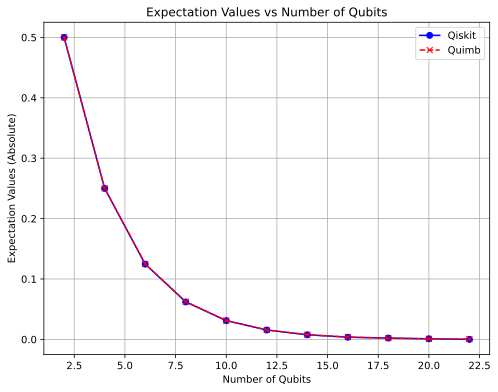

In [60]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(8, 6))
plt.plot(num_qubits_list, absolute_values_qiskit, label='Qiskit', marker='o', linestyle='-', color='b')
plt.plot(num_qubits_list, absolute_values_quimb, label='Quimb', marker='x', linestyle='--', color='r')

# Adding labels and title
plt.xlabel('Number of Qubits')
plt.ylabel('Expectation Values (Absolute)')
plt.title('Expectation Values vs Number of Qubits')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()